# 🧠 PhD Research Summary: Optimizing Subdural Hematoma Surgery with AI & AR
**Presenter:** Scarlett Cheong

## 📚 Background & Significance


- **Condition**: Chronic Subdural Hematoma (CSDH) is a common and potentially serious neurosurgical condition, especially prevalent in the elderly.
- **Clinical Symptoms**: Headache, confusion, vomiting, aphasia, hemiparesis, and balance issues.
- **Current Challenge**: Variability in surgical techniques and decision-making often leads to recurrence, requiring repeat interventions.
- **Motivation**: Use computational methods to standardize and improve surgical planning and execution.


## 🎯 Overall Research Objective

> To develop and deploy a machine learning-driven augmented reality system that optimizes twist-drill craniotomy (TDC) placement for CSDH drainage, reducing recurrence rates and enhancing surgical outcomes.


## 🧪 Research Aims


**Aim 1:** Develop an AI-trained model to detect and segment CSDH from CT scans  
**Aim 2:** Use ML to predict optimal twist-drill placement based on patient-specific hematoma characteristics  
**Aim 3:** Deploy a real-time AR system to visualize the AI/ML output on the patient’s head during surgery


### ✅ Aim 1: Automated Detection & Segmentation of CSDH

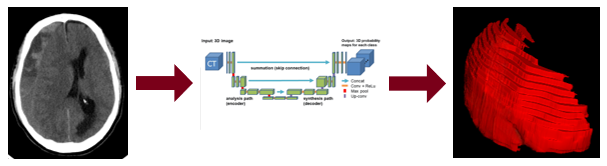


### 🔍 Aim 2: Optimal Drill Site Prediction via ML

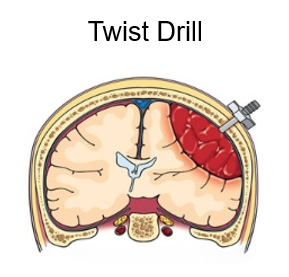


### 🧠 Aim 3: Augmented Reality (AR) Deployment for Neurosurgical Guidance

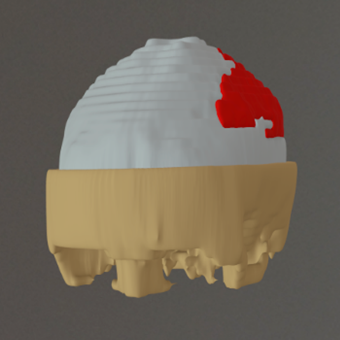 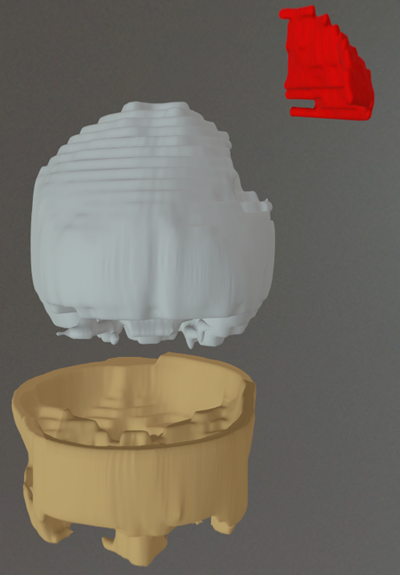


## 🚀 Scientific Impact


- Establish a reproducible deep learning pipeline for CSDH detection
- Advance evidence-based surgical planning through AI
- Demonstrate feasibility of real-time AR visualization in neurosurgery
- Contribute to future clinical decision-support systems


# 🤕 Overview of Traumatic Brain Injury (TBI)

## 🧍‍♂️ Common Cause of TBI: Falls


Falls are one of the most frequent causes of TBI, especially in elderly populations. Head impacts from falls can lead to hematoma formation and brain swelling.


## 🧠 Types of Intracranial Hemorrhage

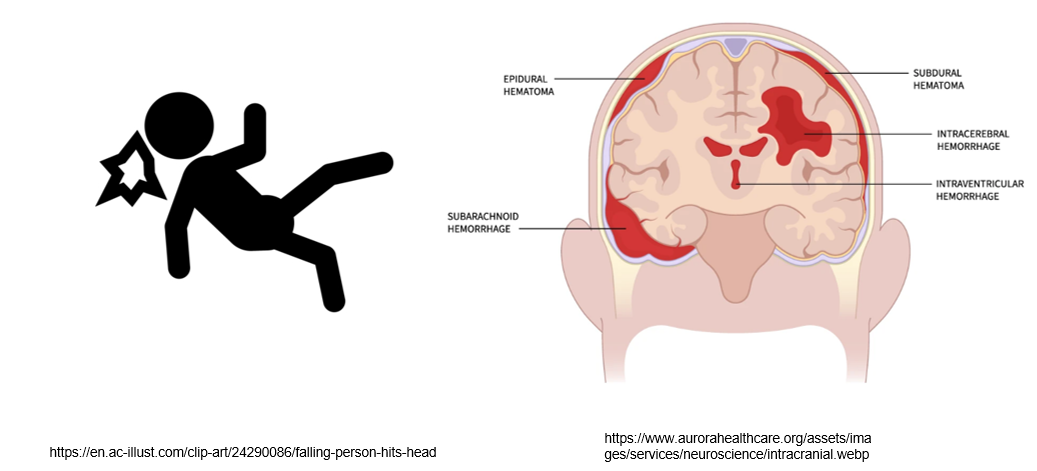

This diagram shows the locations of common hemorrhage types:
- **Epidural Hematoma (EDH)**: between skull and dura
- **Subdural Hematoma (SDH)**: between dura and arachnoid
- **Subarachnoid Hemorrhage (SAH)**: in subarachnoid space
- **Intraventricular Hemorrhage (IVH)**: inside ventricles
- **Intracerebral Hemorrhage (IPH)**: within brain tissue


## 🔬 CT Examples of Hemorrhage Types


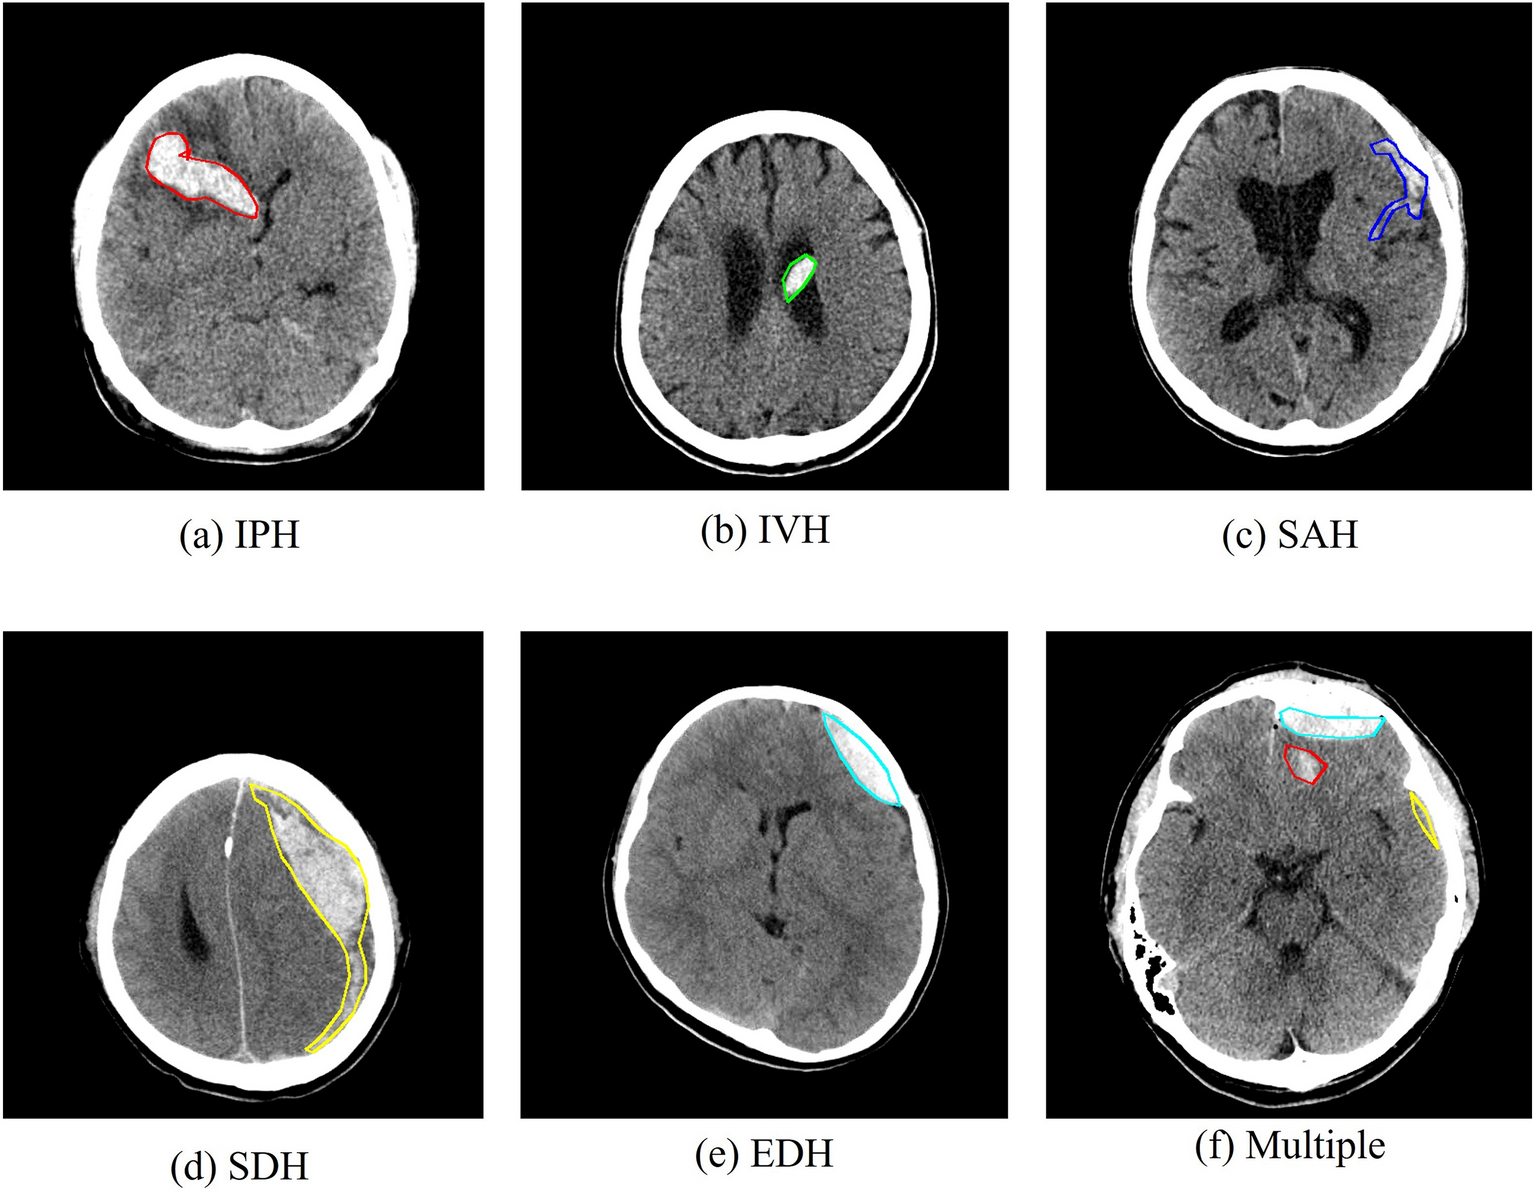
https://www.nature.com/articles/s41598-023-33775-y

These CT images show real patient examples:
- (a) IPH – Intraparenchymal hemorrhage
- (b) IVH – Intraventricular hemorrhage
- (c) SAH – Subarachnoid hemorrhage
- (d) SDH – Subdural hematoma
- (e) EDH – Epidural hematoma
- (f) Multiple – Combined types

Each type has characteristic density and shape, and early identification is critical to treatment decisions.


## 📊 Hounsfield Unit (HU) Reference Scale


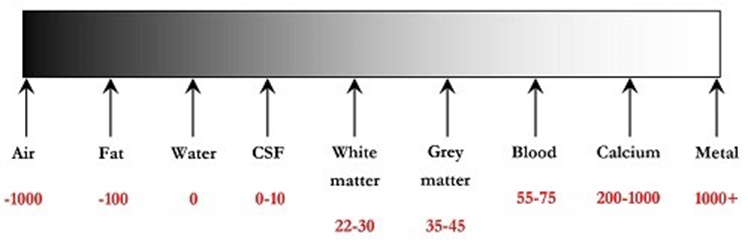
CT scans measure X-ray attenuation in Hounsfield Units (HU). Different tissues have different ranges:
- Air: -1000
- Fat: -100
- Water: 0
- CSF: ~10
- Gray matter: 35–45
- Blood: 55–75
- Bone/Calcium: 200+


# 🖥️ CT Imaging Formats, Conversion, Deidentification & Artifacts
**Presenter:** Scarlett Cheong

# 🧠 Part I: DICOM Series Check & Metadata Extraction

## 🗂️ Overview of Medical Imaging File Formats

| Format | Extension | Description |
|--------|-----------|-------------|
| **DICOM** | `.dcm` | Standard format used in clinical imaging (radiology, CT, MRI). Contains both image data and rich metadata (e.g., patient info, acquisition parameters). |
| **NIfTI** | `.nii`, `.nii.gz` | Common in neuroimaging and research. Designed for 3D/4D volumes; stores spatial orientation info and supports compression. Widely used in tools like FSL, SPM, ANTs. |
| **NRRD** | `.nrrd` | Flexible format for storing n-dimensional raster data. Frequently used in scientific visualization and ITK/3D Slicer environments. Stores metadata in a human-readable header. |

> 🧠 Each format has its strengths:  
> `.dcm` is best for clinical systems, `.nii` for neuroimaging pipelines, and `.nrrd` for visualization and flexible volume data storage.


## 📦 Medical Imaging File Format Comparison

| Format | Extension | Common Use | Metadata Support | Compression | Tools |
|--------|-----------|------------|------------------|-------------|-------|
| **DICOM** | `.dcm` | Clinical imaging (PACS) | ✅ Extensive | ❌ (usually uncompressed) | RadiAnt, OsiriX, 3D Slicer |
| **NIfTI** | `.nii`, `.nii.gz` | Neuroimaging | ✅ Basic | ✅ (`.nii.gz`) | FSL, SPM, ANTs |
| **NRRD** | `.nrrd` | Research & visualization | ✅ Flexible | ✅ | 3D Slicer, ITK, VTK |

> Below is a visual schematic showing how these formats store image and metadata information.


## 📦 Step 1: Install Required Python Packages

In [24]:
## Have to add CT artifact (remedy, hwo to spot it, advance deep learning that can redone the artifacts)

In [ ]:
# !pip install os pydicom numpy subprocess dicom2nifti json nibabel numpy ipywidgets 

In [29]:
import os
import pydicom
import numpy as np
import subprocess
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import ipywidgets as widgets
from IPython.display import display
from scipy.ndimage import label, find_objects

## 🔍 Step 2: Check if the Folder Contains a Valid DICOM Series

In [3]:
## SET DIRECTORY TO DICOM FOLDER
dicom_folder = "C:/Users/Scarlett/Desktop/glbio/dicom/TBI_INVAC184NYT_Series-3"
series_uids = set()

for file in os.listdir(dicom_folder):
    try:
        ds = pydicom.dcmread(os.path.join(dicom_folder, file))
        series_uids.add(ds.SeriesInstanceUID)
    except:
        continue

print("Found Series:", series_uids)


Found Series: {'14409.7.14.2015.272380819733721478369984001743012050348'}


## 📸 Step 3: Visualize a Middle Slice from the DICOM Series

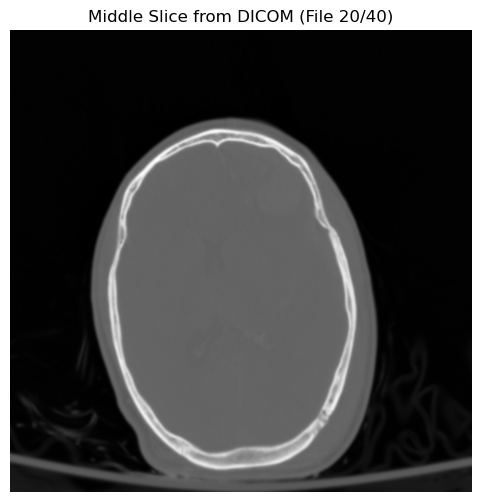

In [4]:

# List all DICOM files (some may not have extensions)
dicom_files = sorted([f for f in os.listdir(dicom_folder) if not '.' in f or f.lower().endswith(".dcm")])

# Pick the middle file
#mid_index = len(dicom_files) // 2
mid_index = 19
mid_file_path = os.path.join(dicom_folder, dicom_files[mid_index])

# Load and show image
ds = pydicom.dcmread(mid_file_path)
image = ds.pixel_array

# Normalize for consistent display
image = image.astype('float32')
image = (image - image.min()) / (image.max() - image.min())

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title(f"Middle Slice from DICOM (File {mid_index + 1}/{len(dicom_files)})")
plt.axis('off')
plt.show()


## 📊 Step 4: Apply Window Level to DICOM Slice (C=50, W=100)

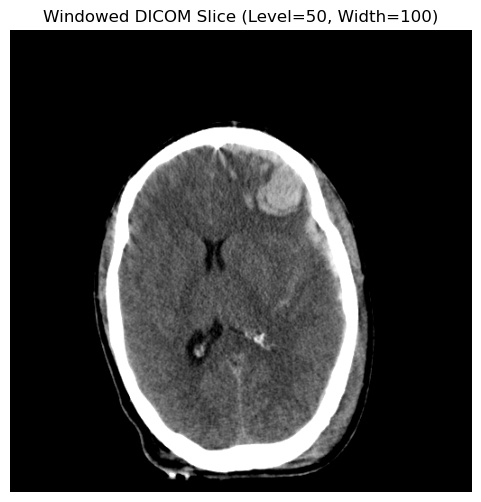

In [5]:

# Get rescale slope/intercept
slope = float(ds.get('RescaleSlope', 1))
intercept = float(ds.get('RescaleIntercept', 0))

# Convert pixel values to Hounsfield Units
raw_image = ds.pixel_array.astype('float32')
hu_image = raw_image * slope + intercept

# Window level settings
window_center = 50
window_width = 100
window_min = window_center - (window_width / 2)
window_max = window_center + (window_width / 2)

# Apply windowing
windowed_image = hu_image.copy()
windowed_image[windowed_image < window_min] = window_min
windowed_image[windowed_image > window_max] = window_max
windowed_image = (windowed_image - window_min) / (window_max - window_min)

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(windowed_image, cmap='gray')
plt.title("Windowed DICOM Slice (Level=50, Width=100)")
plt.axis('off')
plt.show()


## 🧾 Step 5: Display Full DICOM Header for One Slice

In [6]:

for file in os.listdir(dicom_folder):
    if file.lower().endswith(".dcm") or not '.' in file:
        dcm_path = os.path.join(dicom_folder, file)
        ds = pydicom.dcmread(dcm_path)
        print(ds)
        break


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 188
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 14409.7.14.2015.119351875619191785954759479478948374133
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SEQ']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 14409.7.14.2015.119351875619191785954759479478948374133
(0008,0020) Study Date                      

## 📄 Step 6: Read and Display Basic DICOM Metadata

In [7]:

def read_dicom_metadata(dicom_folder):
    for file in os.listdir(dicom_folder):
        if file.lower().endswith(".dcm") or not '.' in file:
            dcm_path = os.path.join(dicom_folder, file)
            ds = pydicom.dcmread(dcm_path)
            print("------ DICOM Metadata ------")
            print(f"Patient ID: {ds.get('PatientID', 'N/A')}")
            print(f"Study Date: {ds.get('StudyDate', 'N/A')}")
            print(f"Modality: {ds.get('Modality', 'N/A')}")
            print(f"Manufacturer: {ds.get('Manufacturer', 'N/A')}")
            print(f"Slice Thickness: {ds.get('SliceThickness', 'N/A')}")
            print(f"Pixel Spacing: {ds.get('PixelSpacing', 'N/A')}")
            print(f"Rows x Columns: {ds.get('Rows', 'N/A')} x {ds.get('Columns', 'N/A')}")
            break

read_dicom_metadata(dicom_folder)


------ DICOM Metadata ------
Patient ID: 548
Study Date: 20000101
Modality: CT
Manufacturer: N/A
Slice Thickness: 4.5
Pixel Spacing: [0.5078125, 0.5078125]
Rows x Columns: 512 x 512


# 🧠 Part II: Convert DICOM to NIfTI and Visualize

## 🛠 Step 1: Define Input and Output Paths

In [8]:
## SET ALL THE PATH TO APPROPROATE DIRECTORY
# Paths
dcm2niix_exe = r"C:\Users\Scarlett\Documents\dcm2niix_win\dcm2niix.exe"
dicom_input_folder = r"C:\Users\Scarlett\Desktop\glbio\dicom\TBI_INVAC184NYT_Series-3"
nifti_output_folder = r"C:\Users\Scarlett\Desktop\glbio\nifti"

# Extract base folder name for output filename
output_filename = os.path.basename(dicom_input_folder)


## 🚀 Step 2: Run the Conversion using dcm2niix

In [9]:

# Build dcm2niix command
command = [
    dcm2niix_exe,
    "-z", "y",  # compress .nii.gz
    "-o", nifti_output_folder,
    "-f", output_filename,
    dicom_input_folder
]

# Run the command
try:
    result = subprocess.run(command, capture_output=True, text=True)
    print("✅ Conversion complete!")
    print("Output filename should be:", output_filename + ".nii.gz")
    print("STDOUT:\n", result.stdout)
except Exception as e:
    print("❌ Error:", e)


✅ Conversion complete!
Output filename should be: TBI_INVAC184NYT_Series-3.nii.gz
STDOUT:
 Compression will be faster with C:\Users\Scarlett\Documents\dcm2niix_win\pigz.exe in the same folder as the executable
Chris Rorden's dcm2niiX version v1.0.20241211  (JP2:OpenJPEG) (JP-LS:CharLS) MSC1942  (64-bit Windows)
Found 40 DICOM file(s)
Gantry Tilt based on 0018,1120 -18, estimated from slice vector 18
Convert 40 DICOM as C:\Users\Scarlett\Desktop\glbio\nifti\TBI_INVAC184NYT_Series-3a (512x512x40x1)
Gantry Tilt Correction is new: please validate conversions
Conversion required 3.190000 seconds.



## 📂 Step 3: Load and Inspect the NIfTI File

In [10]:

# Construct full path to output
nifti_path = os.path.join(nifti_output_folder, output_filename + ".nii.gz")
nifti_img = nib.load(nifti_path)

print("NIfTI Shape:", nifti_img.shape)
print("Voxel Dimensions:", nifti_img.header.get_zooms())


NIfTI Shape: (512, 512, 40)
Voxel Dimensions: (0.5078125, 0.5078125, 4.5003943)


## 🖼️ Step 4: Visualize a Slice from the NIfTI Volume

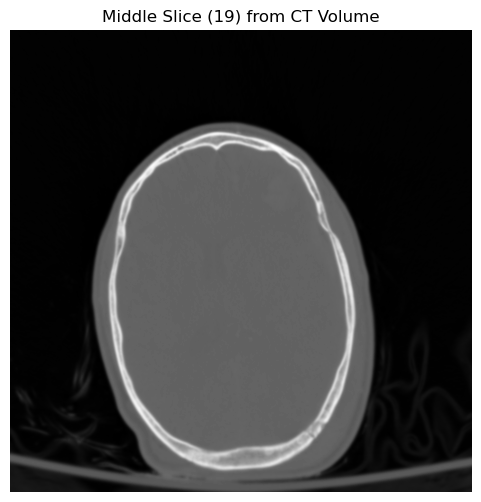

In [11]:

data = nifti_img.get_fdata()
mid_slice = 19

plt.figure(figsize=(6, 6))
plt.imshow(np.rot90(data[:, :, mid_slice], k=1), cmap='gray')  # Rotate 90° counterclockwise
plt.title(f"Middle Slice ({mid_slice}) from CT Volume")
plt.axis('off')
plt.show()


## 🪟 Step 5: Adjust Window Level and Re-Visualize the Slice

We'll apply a basic window level adjustment (center = 50, width = 100), which corresponds to soft tissue contrast in CT scans.

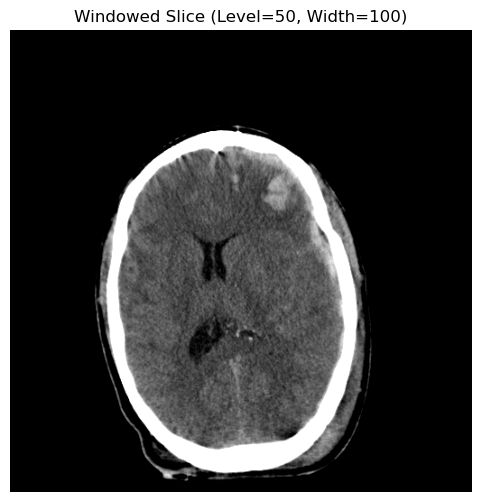

In [12]:

# Window level adjustment
window_center = 50
window_width = 100
window_min = window_center - (window_width / 2)
window_max = window_center + (window_width / 2)

# Apply windowing
windowed_slice = data[:, :, mid_slice].copy()
windowed_slice[windowed_slice < window_min] = window_min
windowed_slice[windowed_slice > window_max] = window_max

# Normalize for display
windowed_slice = (windowed_slice - window_min) / (window_max - window_min)

# Plot the adjusted image
plt.figure(figsize=(6, 6))
plt.imshow(np.rot90(windowed_slice, k=1), cmap='gray')  # Rotate 90° CCW
plt.title(f"Windowed Slice (Level=50, Width=100)")
plt.axis('off')
plt.show()


# 🧠 Part III: Understanding and Comparing dcm2niix Output Files


After converting DICOM files using `dcm2niix`, you often get multiple files:

- **TBI_INVAC184NYT_Series-3.nii.gz**: Standard NIfTI without correcting for gantry tilt.
- **TBI_INVAC184NYT_Series-3_Tilt_Eq_1.nii.gz**: Gantry-tilt-corrected version — important when slices are angled.
- **TBI_INVAC184NYT_Series-3.json**: Metadata describing the scan, useful in research pipelines (e.g., BIDS).

We'll compare the two NIfTI images visually and review the contents of the metadata file.


## 🔄 Compare Orientation: DICOM vs NIfTI (Soft Tissue Window)

We'll compare the same middle slice from the original DICOM and the converted NIfTI volume side-by-side using a soft tissue window (Level=50, Width=100). This helps visualize the orientation difference introduced during DICOM-to-NIfTI conversion.

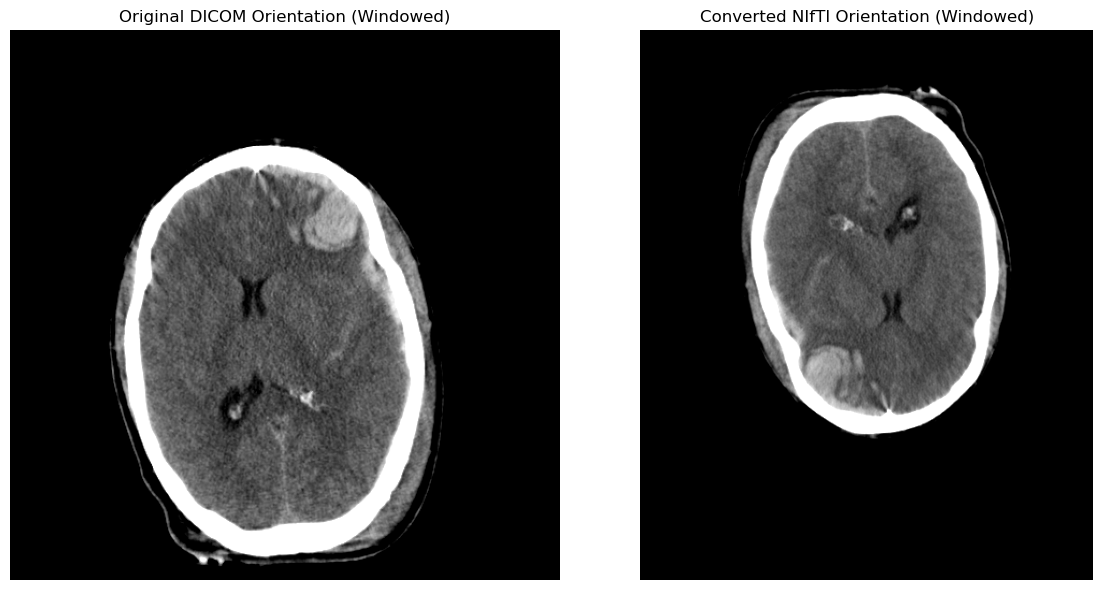

In [23]:

import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Load DICOM slice and convert to Hounsfield Units
dicom_files = sorted([f for f in os.listdir(dicom_input_folder) if not '.' in f or f.lower().endswith(".dcm")])
mid_index = 19
mid_file_path = os.path.join(dicom_input_folder, dicom_files[mid_index])
ds = pydicom.dcmread(mid_file_path)

slope = float(ds.get('RescaleSlope', 1))
intercept = float(ds.get('RescaleIntercept', 0))
hu_dicom = ds.pixel_array.astype('float32') * slope + intercept

# Apply windowing
window_center = 50
window_width = 100
window_min = window_center - (window_width / 2)
window_max = window_center + (window_width / 2)

def apply_window(img):
    win = img.copy()
    win[win < window_min] = window_min
    win[win > window_max] = window_max
    return (win - window_min) / (window_max - window_min)

dicom_windowed = apply_window(hu_dicom)

# Load NIfTI slice and apply same window
mid_slice = 19
nifti_slice = data_tilt[:, :, mid_slice]
nifti_windowed = apply_window(nifti_slice)

# Plot side-by-side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(dicom_windowed, cmap='gray')
plt.title("Original DICOM Orientation (Windowed)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.rot90(nifti_windowed, k=3), cmap='gray')
plt.title("Converted NIfTI Orientation (Windowed)")
plt.axis('off')

plt.tight_layout()
plt.show()



### 🧠 Why Is the NIfTI Orientation Flipped?

The apparent orientation flip between DICOM and NIfTI occurs because:

- **DICOM** uses a patient-based coordinate system (LPS: Left-Posterior-Superior)
- **NIfTI** uses a scanner-based coordinate system (RAS: Right-Anterior-Superior)
- When converting from DICOM to NIfTI, these different conventions can cause slices to appear **rotated or mirrored**, especially when visualized with general-purpose plotting tools like `matplotlib`, which do not account for medical orientation tags.

For accurate visualization, it's important to **rotate NIfTI slices 90° counterclockwise** to match the anatomical view seen in DICOM viewers (like RadiAnt or 3D Slicer).


## 📂 Step 1: Load Both NIfTI Files

In [13]:
## SET ALL THE PATH TO ITS FILE
# Define file paths
original_nifti_path = "C:/Users/Scarlett/Desktop/glbio/nifti/TBI_INVAC184NYT_Series-3.nii.gz"
tilt_corrected_path = "C:/Users/Scarlett/Desktop/glbio/nifti/TBI_INVAC184NYT_Series-3_Tilt_Eq_1.nii.gz"

# Load both images
nii_orig = nib.load(original_nifti_path)
nii_tilt = nib.load(tilt_corrected_path)

# Get data
data_orig = nii_orig.get_fdata()
data_tilt = nii_tilt.get_fdata()

# Show shape comparison
print("Original Shape:", data_orig.shape)
print("Tilt-Corrected Shape:", data_tilt.shape)


Original Shape: (512, 512, 40)
Tilt-Corrected Shape: (512, 622, 42)


## 🖼️ Step 2(A): Visualize a Slice from Both Volumes - Axial View

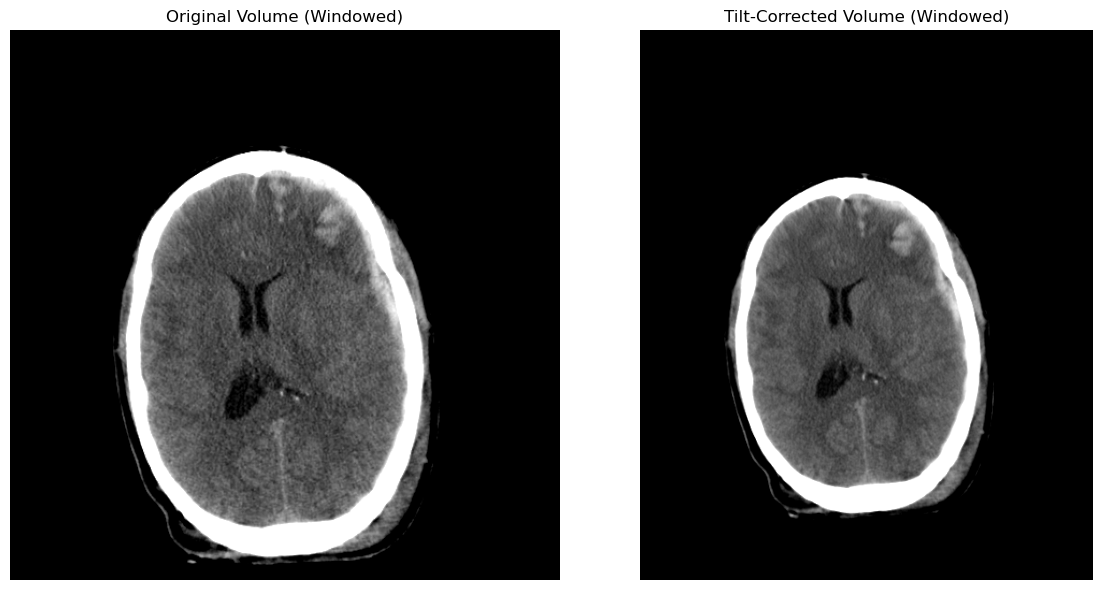

In [14]:

# Window function

# Apply window level (center = 50, width = 100)
window_center = 50
window_width = 100
window_min = window_center - (window_width / 2)
window_max = window_center + (window_width / 2)

def apply_window(slice_data):
    win = slice_data.copy()
    win[win < window_min] = window_min
    win[win > window_max] = window_max
    return (win - window_min) / (window_max - window_min)


# Pick a middle slice index
z_idx_orig = data_orig.shape[2] // 2
z_idx_tilt = data_tilt.shape[2] // 2

# Plot side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.rot90(apply_window(data_orig[:, :, z_idx_orig]), k=1), cmap='gray')
plt.title("Original Volume (Windowed)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.rot90(apply_window(data_tilt[:, :, z_idx_tilt]), k=1), cmap='gray')
plt.title("Tilt-Corrected Volume (Windowed)")
plt.axis('off')

plt.tight_layout()
plt.show()


## 🖼️ Step 2(B): Visualize a Slice from Both Volumes - Sagittal View

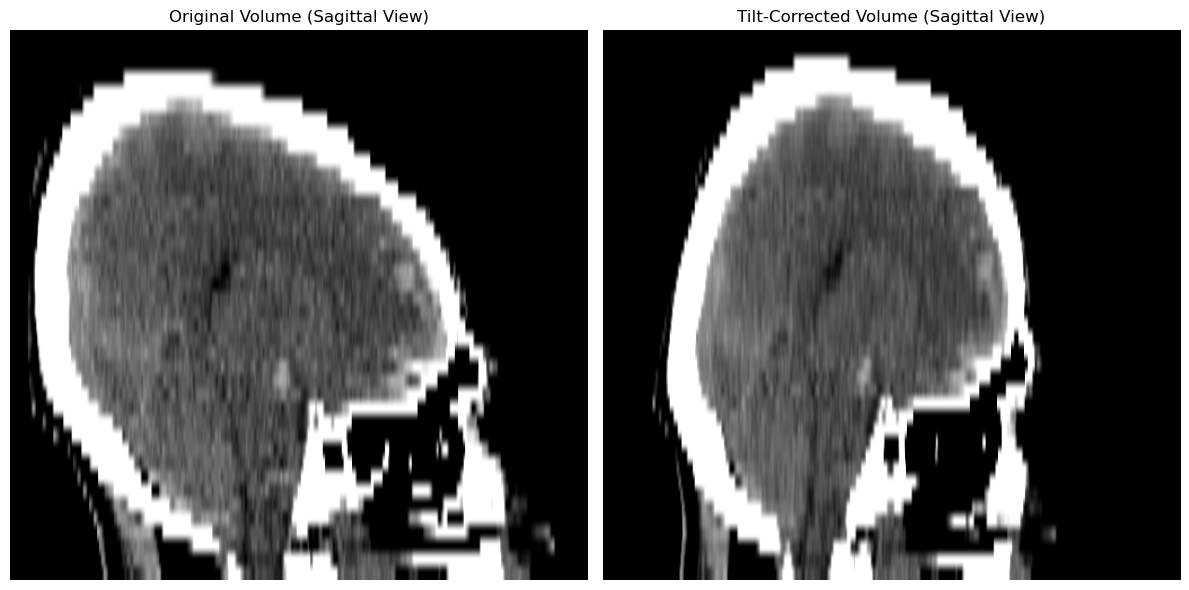

In [15]:

# Apply window level (C=50, W=100)
window_center = 50
window_width = 100
window_min = window_center - (window_width / 2)
window_max = window_center + (window_width / 2)

def apply_window(slice_data):
    win = slice_data.copy()
    win[win < window_min] = window_min
    win[win > window_max] = window_max
    return (win - window_min) / (window_max - window_min)

# Get sagittal slices (slicing along x-axis)
x_idx_orig = data_orig.shape[0] // 2
x_idx_tilt = data_tilt.shape[0] // 2

sagittal_orig = data_orig[x_idx_orig, :, :]
sagittal_tilt = data_tilt[x_idx_tilt, :, :]

# Visualize true sagittal view (rotated for natural viewing)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.flipud(apply_window(np.rot90(sagittal_orig))), cmap='gray', origin='lower', aspect='auto')
plt.title("Original Volume (Sagittal View)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.flipud(apply_window(np.rot90(sagittal_tilt))), cmap='gray', origin='lower', aspect='auto')
plt.title("Tilt-Corrected Volume (Sagittal View)")
plt.axis('off')

plt.tight_layout()
plt.show()


### ✨Tilt correction reprojects angled CT slices into an orthogonal grid. This process adds slices and adjusts pixel dimensions, which results in a new shape. It's essential for accurate 3D analysis and spatial alignment across modalities.

## 📄 Step 3: Display JSON Metadata

In [16]:
## SET ALL THE PATH TO ITS FILE

# Load JSON metadata
json_path = "C:/Users/Scarlett/Desktop/glbio/nifti/TBI_INVAC184NYT_Series-3.json"
with open(json_path, "r") as f:
    metadata = json.load(f)

# Print key fields
print("Modality:", metadata.get("Modality"))
print("Patient Position:", metadata.get("PatientPosition"))
print("Series Description:", metadata.get("SeriesDescription"))
print("Image Orientation:", metadata.get("ImageOrientationPatientDICOM"))
print("De-identification:", metadata.get("DeidentificationMethod"))


Modality: CT
Patient Position: HFS
Series Description: Head  4.5  H31s
Image Orientation: [1, 0, 0, 0, 0.951057, -0.309017]
De-identification: ['CTP Default:  based on DICOM PS3.15 AnnexE. Details in 0012,0064']


## ✅ Summary


- **Use the tilt-corrected version** if you plan to do 3D modeling, segmentation, or alignment.
- **The .json file** provides essential scan and de-identification context — especially useful in research sharing or automated pipelines.


# 🧠 Part IV: Interactive Slice Viewer and Basic Threshold-Based Segmentation

## 🖱️ Step 1: Interactive Viewer to Explore Slices

In [17]:

# Apply window level (center = 50, width = 100)
window_center = 50
window_width = 100
window_min = window_center - (window_width / 2)
window_max = window_center + (window_width / 2)

def apply_window(slice_data):
    win = slice_data.copy()
    win[win < window_min] = window_min
    win[win > window_max] = window_max
    return (win - window_min) / (window_max - window_min)


def view_slice(z):
    plt.figure(figsize=(6, 6))
    rotated = np.rot90(apply_window(data_tilt[:, :, z]), k=1)  # Rotate 90° CCW
    plt.imshow(rotated, cmap='gray')
    plt.title(f"Slice {z} (Windowed: C=50, W=100)")
    plt.axis('off')
    plt.show()

# Slider to choose slice
widgets.interact(view_slice, z=widgets.IntSlider(min=0, max=data_tilt.shape[2]-1, step=1, value=data_tilt.shape[2]//2))


interactive(children=(IntSlider(value=21, description='z', max=41), Output()), _dom_classes=('widget-interact'…

<function __main__.view_slice(z)>

## 🧪 Step 2: Simple Threshold-Based Segmentation

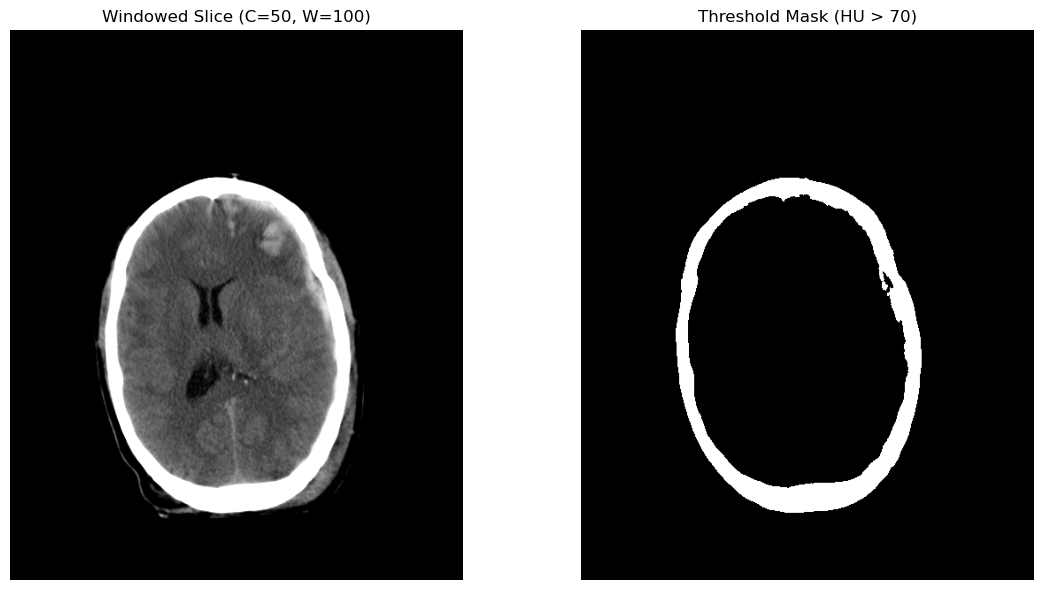

In [18]:

# Apply window level (center = 50, width = 100)
window_center = 50
window_width = 100
window_min = window_center - (window_width / 2)
window_max = window_center + (window_width / 2)

def apply_window(slice_data):
    win = slice_data.copy()
    win[win < window_min] = window_min
    win[win > window_max] = window_max
    return (win - window_min) / (window_max - window_min)


# Select a slice and apply a threshold to highlight dense regions (like bone or blood)
slice_index = data_tilt.shape[2] // 2
slice_data = data_tilt[:, :, slice_index]
windowed = apply_window(slice_data)

# Simple threshold for hyperdense regions (HU > ~70)
threshold_min = 70
mask = slice_data > threshold_min

#Visualize original vs mask (rotated 90° counterclockwise)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.rot90(windowed, k=1), cmap='gray')  # Rotate left
plt.title("Windowed Slice (C=50, W=100)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.rot90(mask, k=1), cmap='gray')  # Rotate left
plt.title("Threshold Mask (HU > 70)")
plt.axis('off')

plt.tight_layout()
plt.show()


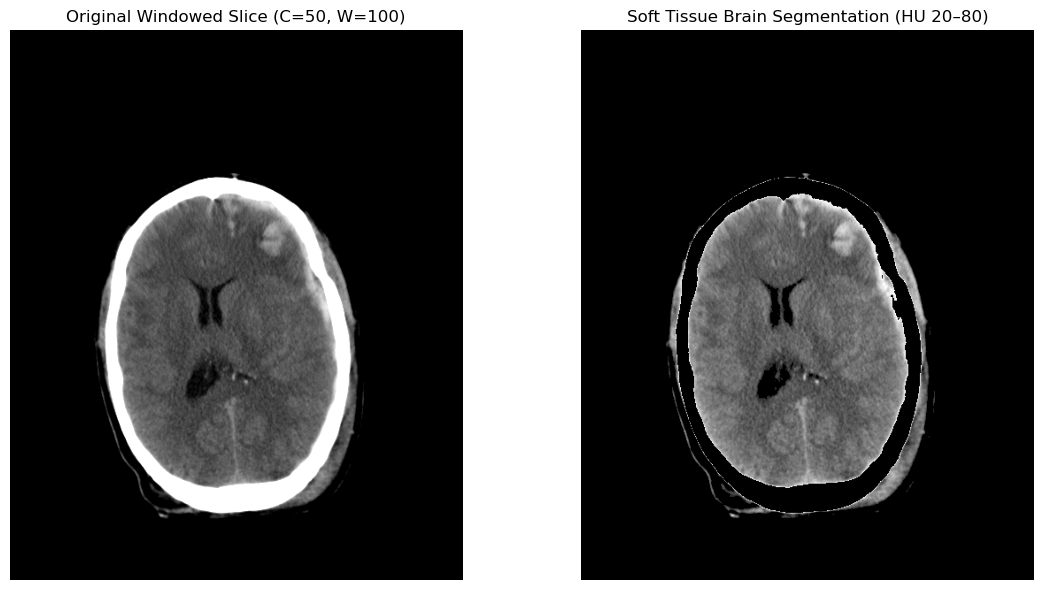

In [36]:
# Threshold to isolate soft tissue brain (approx. HU 20–80)
lower_bound = 10   # Below this = CSF/air
upper_bound = 80   # Above this = skull/bone

# Get a slice
slice_index = data_tilt.shape[2] // 2
slice_data = data_tilt[:, :, slice_index]
windowed = apply_window(slice_data)

# Create soft tissue mask
soft_tissue_mask = (slice_data > lower_bound) & (slice_data < upper_bound)

# Apply mask to the windowed slice
brain_only = windowed * soft_tissue_mask

# Plot windowed vs soft tissue extraction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.rot90(windowed, k=1), cmap='gray')
plt.title("Original Windowed Slice (C=50, W=100)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.rot90(brain_only, k=1), cmap='gray')
plt.title("Soft Tissue Brain Segmentation (HU 20–80)")
plt.axis('off')

plt.tight_layout()
plt.show()


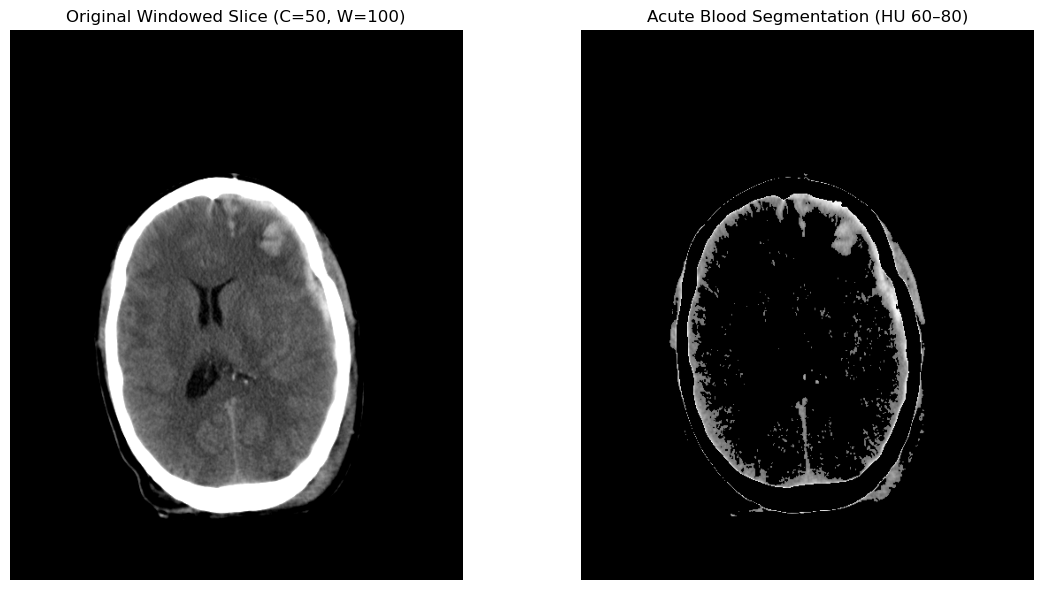

In [40]:
# Define HU thresholds for acute blood
blood_lower = 40
blood_upper = 90

# Select a slice
slice_index = data_tilt.shape[2] // 2
slice_data = data_tilt[:, :, slice_index]
windowed = apply_window(slice_data)

# Create mask for acute blood (hyperdense, but not bone)
acute_blood_mask = (slice_data >= blood_lower) & (slice_data <= blood_upper)

# Apply mask to the windowed image
blood_only = windowed * acute_blood_mask

# Plot side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.rot90(windowed, k=1), cmap='gray')
plt.title("Original Windowed Slice (C=50, W=100)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.rot90(blood_only, k=1), cmap='gray')
plt.title("Acute Blood Segmentation (HU 40–90)")
plt.axis('off')

plt.tight_layout()
plt.show()


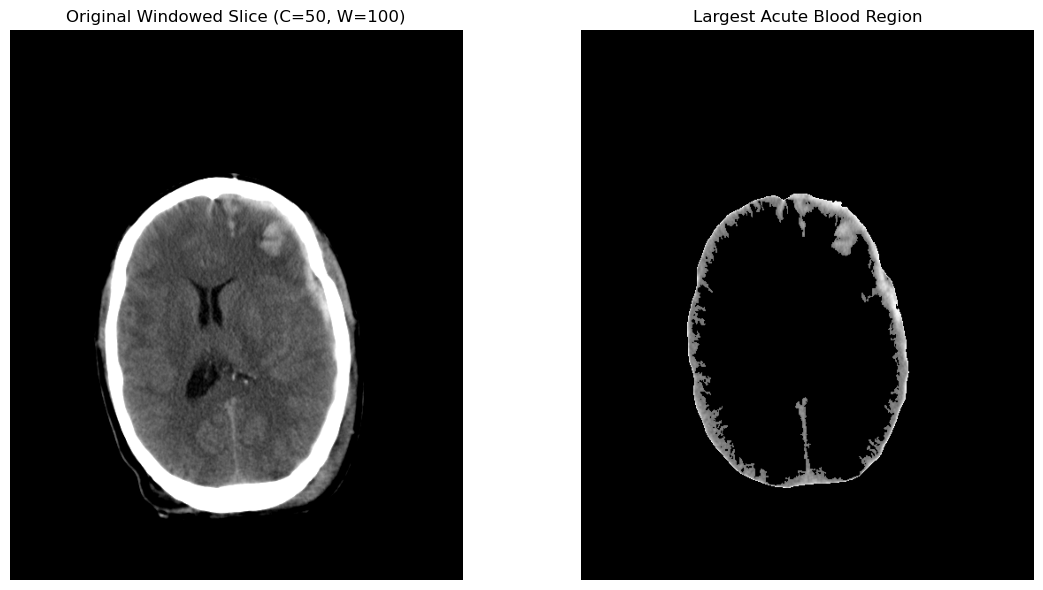

In [41]:

# 1. Create the binary mask for acute blood
acute_blood_mask = (slice_data >= blood_lower) & (slice_data <= blood_upper)

# 2. Label connected components
labeled_mask, num_features = label(acute_blood_mask)

# 3. Find the largest component (by pixel count)
if num_features > 0:
    component_sizes = [(labeled_mask == i).sum() for i in range(1, num_features + 1)]
    largest_component = component_sizes.index(max(component_sizes)) + 1
    largest_mask = labeled_mask == largest_component
else:
    largest_mask = np.zeros_like(acute_blood_mask)

# 4. Apply the largest mask to the windowed image
largest_blood_only = windowed * largest_mask

# 5. Plot comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.rot90(windowed, k=1), cmap='gray')
plt.title("Original Windowed Slice (C=50, W=100)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.rot90(largest_blood_only, k=1), cmap='gray')
plt.title("Largest Acute Blood Region")
plt.axis('off')

plt.tight_layout()
plt.show()


In [48]:
# Define HU range
blood_lower, blood_upper = 40, 90

# Create 3D mask
blood_mask_3d = (data_tilt >= blood_lower) & (data_tilt <= blood_upper)

# Label components
labeled_volume, num_features = label(blood_mask_3d)
if num_features > 0:
    sizes = [(labeled_volume == i).sum() for i in range(1, num_features + 1)]
    largest_id = np.argmax(sizes) + 1
    largest_mask = labeled_volume == largest_id
else:
    largest_mask = np.zeros_like(data_tilt, dtype=bool)

# Multiply with raw CT volume
largest_blood_volume = data_tilt * largest_mask


def view_segmented_blood_slice(z):
    plt.figure(figsize=(6, 6))
    plt.imshow(np.rot90(largest_blood_volume[:, :, z]), cmap='gray')
    plt.title(f"Largest Acute Blood Region – Slice {z}")
    plt.axis('off')
    plt.show()

interact(view_segmented_blood_slice, z=(0, largest_blood_volume.shape[2] - 1))


interactive(children=(IntSlider(value=20, description='z', max=41), Output()), _dom_classes=('widget-interact'…

<function __main__.view_segmented_blood_slice(z)>

## ⚠️ Part V: Understanding CT Artifacts – Causes, Appearance, and Impact

## 🧱 1. What Are CT Artifacts?
CT artifacts are distortions or errors in CT images that do not accurately represent the scanned anatomy. They can arise from patient motion, metal implants, beam physics, or image reconstruction errors. Understanding them is critical for avoiding diagnostic pitfalls.


## 🌀 2. Motion Artifacts
- Cause: patient movement during scan (e.g. breathing, tremors)

- Appearance: ghosting, streaking

- Impact: can obscure pathology (e.g., hemorrhages, fractures)

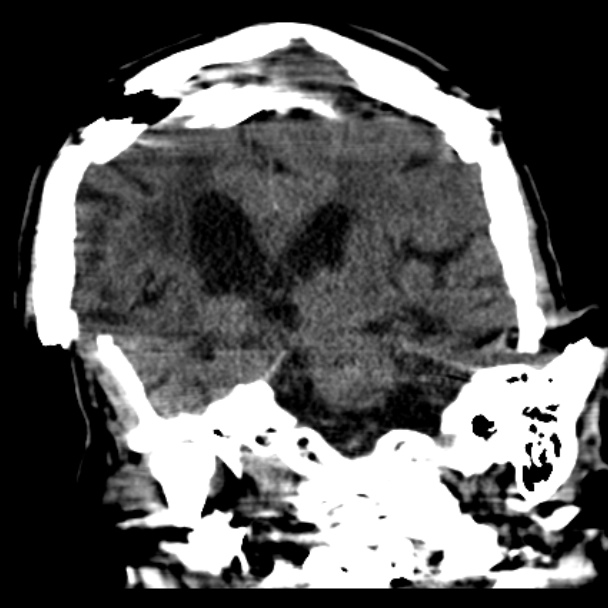 
   - Authors: Cuete D, Murphy A, Niknejad M, et al.
   - Journal: Radiopeadia
   - DOI: https://doi.org/10.53347/rID-25638
   - link: https://radiopaedia.org/articles/ct-artifacts?lang=us


## 🧲 3. Metal Artifacts
- Cause: presence of surgical clips, dental implants, hardware

- Appearance: bright streaks or dark bands radiating from the metal

- Fix: metal artifact reduction (MAR) algorithms

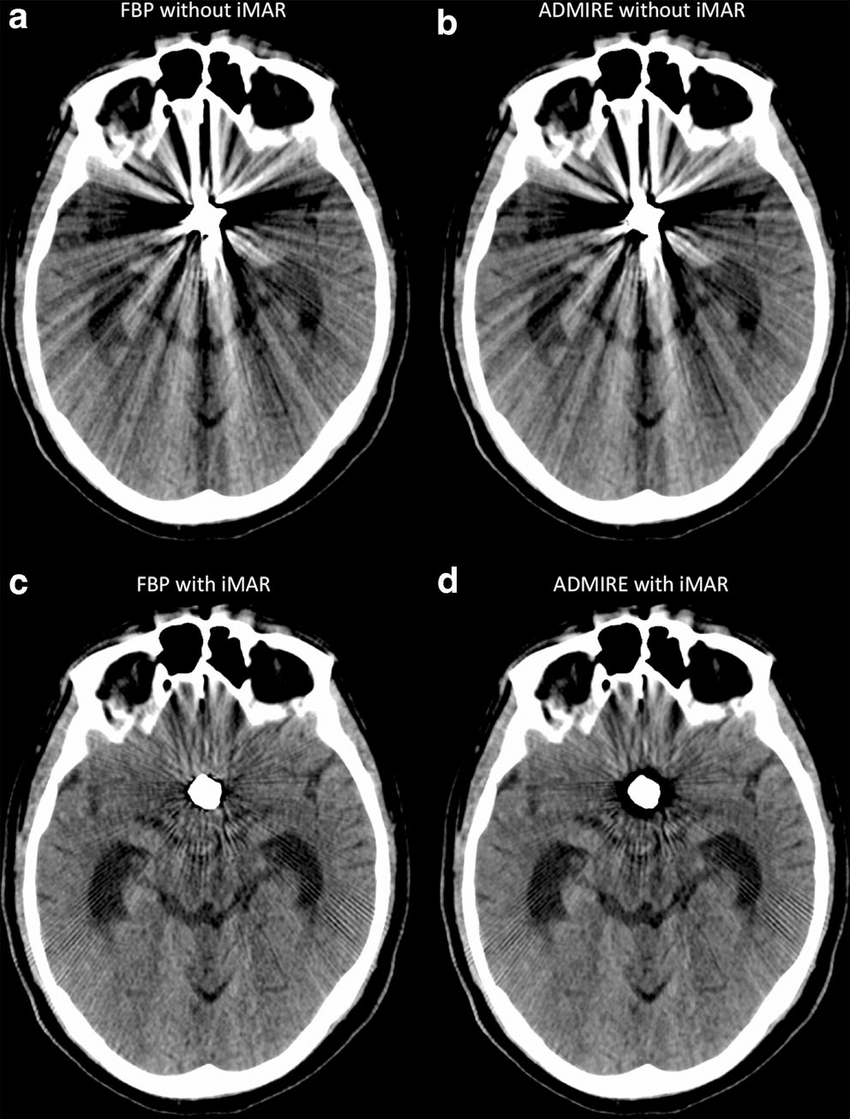
https://www.researchgate.net/figure/Axial-brain-unenhanced-CT-images-illustrating-the-4-combinations-of-reconstruction-from-a_fig1_325856304

## 💥 4. Beam Hardening
- Cause: low-energy photons absorbed more than high-energy ones → non-uniform attenuation

- Appearance: dark streaks or cupping, often near dense structures (like bone)

- Seen in: posterior fossa, skull base

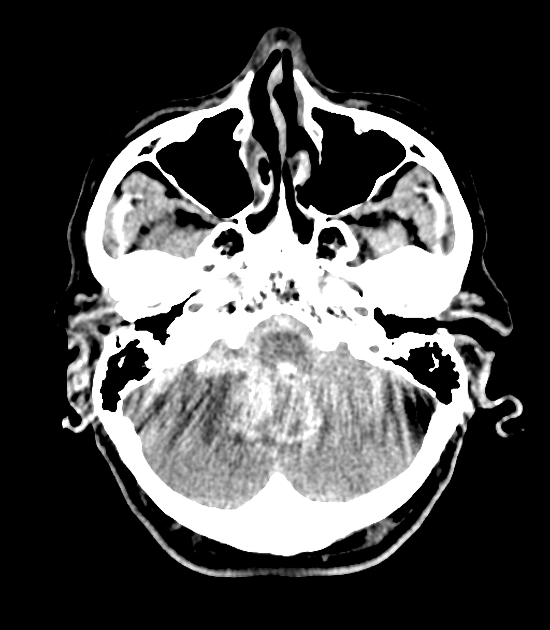
   - Authors: Murphy A, Hacking C, Campos A, et al.
   - Journal: Radiopeadia
   - DOI: https://doi.org/10.53347/rID-48590
   - link: https://radiopaedia.org/articles/beam-hardening


## 📌 5. How to Minimize Artifacts
- Instruct patient to remain still
- Use thinner slices when possible
- Apply metal artifact reduction (MAR) algorithms
- Adjust window/level settings
- Use dual-energy CT in complex metal cases


## 🧠 6. Machine Learning-Based Artifact Reduction

- Convolutional Neural Networks (CNNs) and other deep learning models can be trained to learn the patterns of CT artifacts (e.g., motion, metal, beam hardening).
- These models are often trained on pairs of **artifact-corrupted** and **artifact-free** images, learning to denoise, deblur, or restore clean anatomy.
- Even in downsampled (low-resolution) scans, CNNs can enhance contrast and texture fidelity, then **reconstruct high-quality CT images** without artifacts.
- This approach is especially promising in settings where MAR algorithms are not available, or when scan quality is compromised due to patient or equipment limitations.


## 📄 Suggested Paper (IEEE TMI, 2018):
- Title: Convolutional Neural Network Based Metal Artifact Reduction in X-Ray Computed Tomography
- Authors: Zhang Y, Yu H.
- Journal: IEEE Trans Med Imaging. 2018;37(6):1370-1381
- DOI: 10.1109/TMI.2018.2823083
- link: https://pmc.ncbi.nlm.nih.gov/articles/PMC5998663/#S15

- Summary: This study developed a CNN to correct metal-induced artifacts in CT scans. The model improved image quality by learning residual artifact patterns and restoring the underlying anatomy, outperforming traditional MAR techniques.

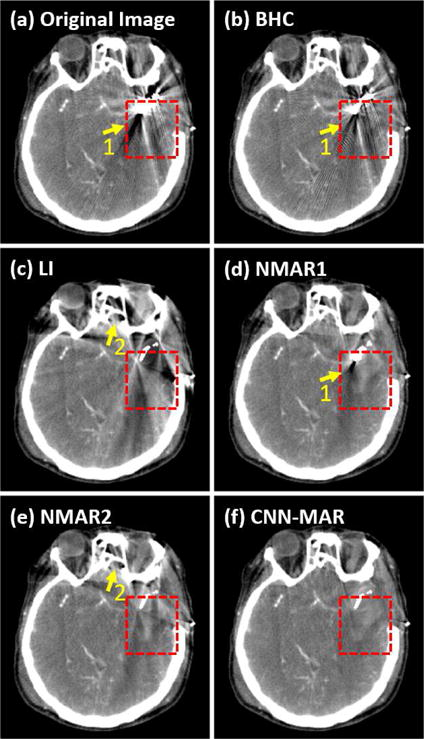
The head CT image with a surgical clip. (a) is the original uncorrected image, and (b)–(f) are the corrected results by the BHC, LI, NMAR1, NMAR2 and CNN-MAR, respectively. The display window is [−100 200] HU.

---

## 🙏 Thank You!

Thank you for exploring this hands-on session on structural neuroimaging and medical image analysis.

I hope this workshop provided a useful introduction to working with CT data, understanding artifacts, and exploring segmentation techniques. If you have any questions, ideas, or would like to collaborate, feel free to reach out!

👩🏻‍💻 *Scarlett Cheong*  
📧 cheon068@umn.edu  
🔬 University of Minnesota  
